In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

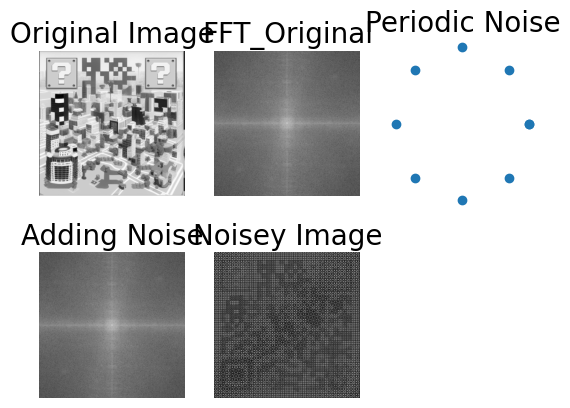

In [2]:
orig = cv2.imread('image.png', 0)
FS = np.fft.fft2(orig)

fshift = np.fft.fftshift(FS)

magnitude_spectrum1 = 20*np.log(np.abs(fshift))

m,n = fshift.shape

cx = int(n/2)
cy = int(m/2)

theta = np.linspace(0, 2*np.pi, 9)

r = 80

x = (r*np.cos(theta)+cx)
y = (r*np.sin(theta)+cy)

x = x.astype(int)
y = y.astype(int)

for i, j in zip(x,y):
    fshift[j,i] = (np.abs(fshift[cy,cx])/2) + 0j

magnitude_spectrum2 = 20*np.log(np.abs(fshift))

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(231)
plt.imshow(orig, cmap = 'gray')
plt.title('Original Image', fontsize = 20)
plt.axis('off')

plt.subplot(232)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('FFT_Original', fontsize = 20)
plt.axis('off')

plt.subplot(233)
plt.plot(x,y, 'o')
plt.title('Periodic Noise', fontsize = 20)
plt.axis('off')

plt.subplot(234)
plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Adding Noise', fontsize = 20)
plt.axis('off')

plt.subplot(235)
plt.imshow(img_back, cmap = 'gray')
plt.title('Noisey Image', fontsize = 20)
plt.axis('off')

plt.show()